In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [3]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [4]:
#check for missing value
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [6]:
# Fill missing values for non-churned users
df['Date_of_Churn'].fillna('Not Churned', inplace=True)
df['Reason_for_Churn'].fillna('Not Churned', inplace=True)
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,Not Churned,Not Churned
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,Not Churned,Not Churned
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,Not Churned,Not Churned
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,Not Churned,Not Churned
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,Not Churned,Not Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,Not Churned,Not Churned
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,Not Churned,Not Churned
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


In [7]:
#check if the missing values still exist
df.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Location                   0
Subscription_Start_Date    0
Subscription_Type          0
Monthly_Payment            0
Payment_Method             0
Monthly_Hours_Watched      0
Favorite_Genre             0
Devices_Used               0
Average_Session_Length     0
Content_ID                 0
Rating_Given               0
Churned                    0
Date_of_Churn              0
Reason_for_Churn           0
dtype: int64

In [8]:
# Fill missing values for non-churned users
df['Date_of_Churn'].fillna('Not Churned', inplace=True)
df['Reason_for_Churn'].fillna('Not Churned', inplace=True)

## Convert 'Subscription_Start_Date' and 'Date_of_Churn' to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = df['Date_of_Churn'].apply(lambda x: pd.to_datetime(x) if x != 'Not Churned' else pd.NaT)


In [9]:
#calculate churn rate
df['Churned'].mean()

0.246

In [10]:
#split data into two samples
churned = df[df['Churned'] == 1]
not_churned = df[df['Churned'] == 0]

In [11]:
# Initialize a dictionary to store the total revenue for each subscription type regardless of churned or not
total_revenue_by_subscription = {}

for index, row in df.iterrows():
    subscription_type = row['Subscription_Type']
    revenue = row['Monthly_Payment']
    
    # If the subscription type is already in the dictionary, add the revenue to the existing total
    if subscription_type in total_revenue_by_subscription:
        total_revenue_by_subscription[subscription_type] += revenue
    # If the subscription type is not in the dictionary, initialize the total with the current revenue
    else:
        total_revenue_by_subscription[subscription_type] = revenue

# Print the total revenue for each subscription type
for subscription_type, total_revenue in total_revenue_by_subscription.items():
    print(f"{subscription_type}: ${total_revenue:.2f}")

Premium: $3878.06
Standard: $7944.70
Basic: $2757.24


In [12]:
#calculate the revenue lost for not_churned clients
total_revenue_by_subscription = {}

for index, row in not_churned.iterrows():
    subscription_type = row['Subscription_Type']
    revenue = row['Monthly_Payment']
    
    if subscription_type in total_revenue_by_subscription:
        total_revenue_by_subscription[subscription_type] += revenue
    else:
        total_revenue_by_subscription[subscription_type] = revenue

# Print the total revenue for each subscription type
for subscription_type, total_revenue in total_revenue_by_subscription.items():
    print(f"{subscription_type}: ${total_revenue:.2f}")

Premium: $2898.55
Standard: $6085.94
Basic: $2027.97


In [72]:
total_revenue = 2898.55+6085.94+2027.97
total_revenue

11012.46

In [13]:
#subscription type vs. churned
df.groupby('Subscription_Type')['Churned'].mean()

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

In [14]:
df.groupby('Subscription_Type')['Churned'].value_counts()

Subscription_Type  Churned
Basic              0          203
                   1           73
Premium            0          145
                   1           49
Standard           0          406
                   1          124
Name: Churned, dtype: int64

<AxesSubplot:xlabel='Subscription_Type', ylabel='Churned'>

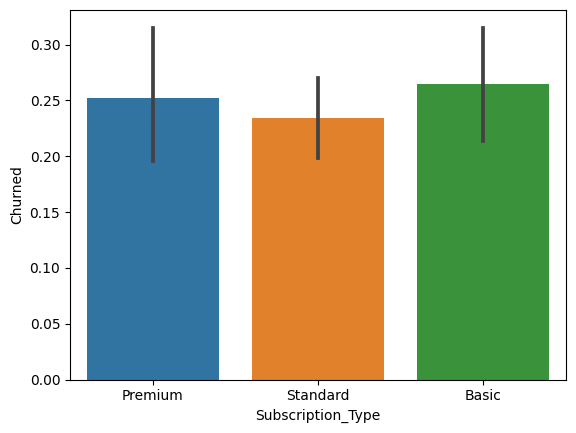

In [15]:
sns.barplot(x=df['Subscription_Type'],y=df['Churned'], data=df)

In [16]:
#location vs. churned
df.groupby('Location')['Churned'].mean()

Location
Central    0.233831
East       0.300000
North      0.259804
South      0.234637
West       0.203704
Name: Churned, dtype: float64

In [17]:
df.groupby('Location')['Churned'].value_counts()

Location  Churned
Central   0          154
          1           47
East      0          140
          1           60
North     0          151
          1           53
South     0          137
          1           42
West      0          172
          1           44
Name: Churned, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='Churned'>

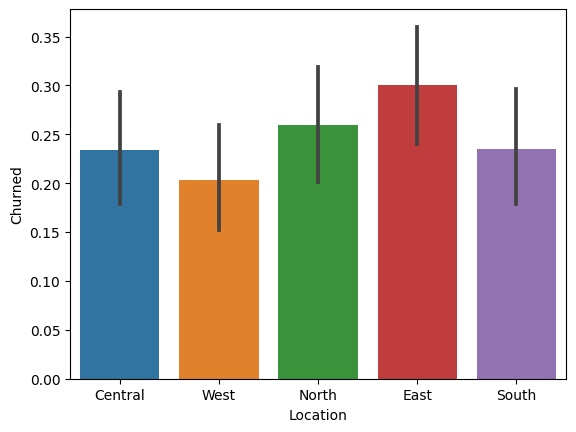

In [18]:
sns.barplot(x='Location', y='Churned', data=df)

Subscription_Type  Basic  Premium  Standard
Location                                   
Central               61       41        99
East                  42       44       114
North                 56       39       109
South                 58       27        94
West                  59       43       114


Text(0, 0.5, 'Percentage')

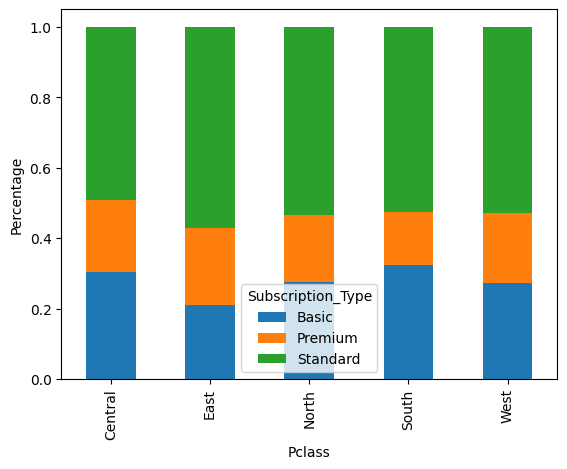

In [19]:
tab = pd.crosstab(df['Location'], df['Subscription_Type'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

In [20]:
#devices used vs. churned
df.groupby('Devices_Used')['Churned'].value_counts()

Devices_Used  Churned
Mobile        0          277
              1          131
PC            0          147
              1           27
TV            0          157
              1           44
Tablet        0          173
              1           44
Name: Churned, dtype: int64

In [21]:
df.groupby('Devices_Used')['Churned'].mean()

Devices_Used
Mobile    0.321078
PC        0.155172
TV        0.218905
Tablet    0.202765
Name: Churned, dtype: float64

<AxesSubplot:xlabel='Devices_Used', ylabel='Churned'>

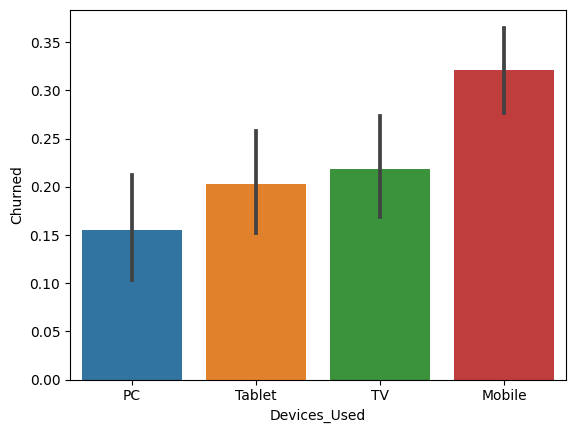

In [22]:
sns.barplot(x='Devices_Used', y='Churned', data=df)

In [23]:
#feedback vs. churned
df.groupby('Reason_for_Churn')['Churned'].value_counts()

Reason_for_Churn           Churned
Dissatisfied with content  1           52
Found better service       1           64
Not Churned                0          754
Personal reasons           1           62
Price increase             1           68
Name: Churned, dtype: int64

In [24]:
#Favorite_Genre used vs. churned
df.groupby('Favorite_Genre')['Churned'].value_counts()

Favorite_Genre  Churned
Action          0          156
                1           49
Comedy          0          154
                1           49
Documentary     0          136
                1           52
Drama           0          165
                1           47
Sci-Fi          0          143
                1           49
Name: Churned, dtype: int64

In [25]:
df.groupby('Favorite_Genre')['Churned'].mean()

Favorite_Genre
Action         0.239024
Comedy         0.241379
Documentary    0.276596
Drama          0.221698
Sci-Fi         0.255208
Name: Churned, dtype: float64

<AxesSubplot:xlabel='Favorite_Genre', ylabel='Churned'>

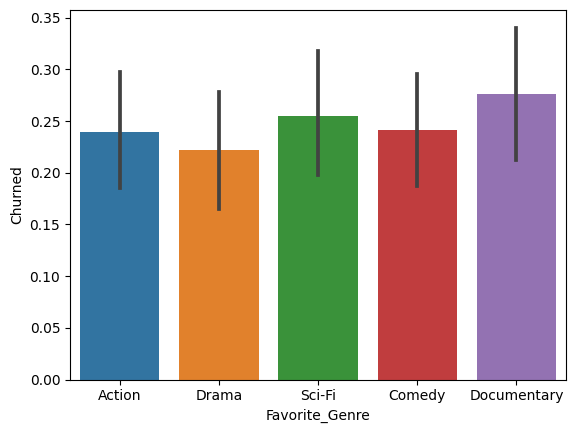

In [26]:
sns.barplot(x='Favorite_Genre', y='Churned', data=df)

In [27]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])
df['Devices_Used'] = le.fit_transform(df['Devices_Used'])

In [28]:
#normalize
df['Hours_Watch_per_dolloar'] = df['Monthly_Hours_Watched'] / df['Monthly_Payment']
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar
0,1,56,2,0,2020-06-07 01:53:37.656934,1,19.99,0,31.513153,0,1,1.195762,1023,5,0,NaT,Not Churned,1.576446
1,2,69,2,4,2024-02-21 01:53:37.656980,2,14.99,0,4.982277,3,1,0.809002,1076,1,0,NaT,Not Churned,0.332373
2,3,46,0,2,2022-10-06 01:53:37.656995,2,14.99,2,4.114953,4,3,1.153570,1095,2,0,NaT,Not Churned,0.274513
3,4,32,0,1,2022-01-04 01:53:37.657006,2,14.99,0,60.244820,0,2,0.609503,1003,1,0,NaT,Not Churned,4.019001
4,5,60,0,2,2020-03-13 01:53:37.657017,2,14.99,0,4.711855,4,0,0.359971,1012,4,0,NaT,Not Churned,0.314333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,2,1,2020-10-26 01:53:37.667884,0,9.99,2,0.700179,2,0,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,0.070088
996,997,66,0,4,2020-05-06 01:53:37.667895,2,14.99,0,20.153308,0,0,3.222521,1069,4,0,NaT,Not Churned,1.344450
997,998,52,2,3,2019-06-19 01:53:37.667906,2,14.99,2,39.170314,3,1,1.221380,1079,1,0,NaT,Not Churned,2.613096
998,999,69,1,1,2020-11-13 01:53:37.667917,2,14.99,0,8.455372,4,0,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,0.564068


In [29]:
churned_1 = df[df['Churned'] == 1]
not_churned_1 = df[df['Churned'] == 0]

In [30]:
df.describe()

,User_ID,Age,Gender,Location,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Hours_Watch_per_dolloar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,1.006000,2.009000,1.254000,14.580000,0.58000,19.071653,1.98300,1.227000,1.893771,1049.201000,3.030000,0.246000,1.380001
std,288.819436,15.321669,0.816475,1.431422,0.861526,3.404922,0.79387,19.279140,1.41588,1.194528,1.868852,29.268058,1.422365,0.430894,1.461545
min,1.000000,18.000000,0.000000,0.000000,0.000000,9.990000,0.00000,0.041574,0.00000,0.000000,0.000486,1000.000000,1.000000,0.000000,0.002773
25%,250.750000,31.750000,0.000000,1.000000,0.000000,9.990000,0.00000,5.490739,1.00000,0.000000,0.548918,1023.000000,2.000000,0.000000,0.392404
50%,500.500000,45.000000,1.000000,2.000000,2.000000,14.990000,0.00000,13.361219,2.00000,1.000000,1.271808,1048.000000,3.000000,0.000000,0.915018
75%,750.250000,57.000000,2.000000,3.000000,2.000000,14.990000,1.00000,26.471636,3.00000,2.000000,2.623575,1075.000000,4.000000,0.000000,1.893195
max,1000.000000,70.000000,2.000000,4.000000,2.000000,19.990000,2.00000,139.170408,4.00000,3.000000,11.417557,1099.000000,5.000000,1.000000,10.823059


In [31]:
churned_1.describe()

,User_ID,Age,Gender,Location,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Hours_Watch_per_dolloar
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000
mean,505.361789,43.174797,1.004065,1.902439,1.207317,14.502195,0.589431,17.039672,1.991870,1.004065,1.920114,1050.443089,2.593496,1.0,1.263398
std,284.676765,15.507139,0.835430,1.375676,0.872311,3.494289,0.796760,17.236483,1.411301,1.196928,1.841691,30.536877,1.273513,0.0,1.428794
min,13.000000,18.000000,0.000000,0.000000,0.000000,9.990000,0.000000,0.041574,0.000000,0.000000,0.000821,1000.000000,1.000000,1.0,0.002773
25%,273.250000,30.000000,0.000000,1.000000,0.000000,9.990000,0.000000,5.105890,1.000000,0.000000,0.641881,1022.250000,2.000000,1.0,0.352179
50%,501.500000,41.000000,1.000000,2.000000,2.000000,14.990000,0.000000,11.948593,2.000000,0.000000,1.277379,1050.000000,2.000000,1.0,0.801545
75%,752.250000,56.000000,2.000000,3.000000,2.000000,14.990000,1.000000,23.618435,3.000000,2.000000,2.704228,1077.750000,3.000000,1.0,1.706710
max,999.000000,70.000000,2.000000,4.000000,2.000000,19.990000,2.000000,108.122364,4.000000,3.000000,11.417557,1099.000000,5.000000,1.0,10.823059


In [32]:
not_churned_1.describe()

,User_ID,Age,Gender,Location,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Hours_Watch_per_dolloar
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0,754.000000
mean,498.913793,44.779841,1.006631,2.043767,1.269231,14.605385,0.576923,19.734607,1.980106,1.299735,1.885177,1048.795756,3.172414,0.0,1.418044
std,290.327761,15.250257,0.810757,1.448338,0.858011,3.377227,0.793431,19.866013,1.418293,1.185492,1.878760,28.851328,1.440076,0.0,1.471006
min,1.000000,18.000000,0.000000,0.000000,0.000000,9.990000,0.000000,0.076891,0.000000,0.000000,0.000486,1000.000000,1.000000,0.0,0.003846
25%,245.250000,32.000000,0.000000,1.000000,0.000000,9.990000,0.000000,5.657050,1.000000,0.000000,0.516868,1023.000000,2.000000,0.0,0.396543
50%,500.000000,45.500000,1.000000,2.000000,2.000000,14.990000,0.000000,13.791423,2.000000,1.000000,1.271808,1047.500000,3.000000,0.0,0.961556
75%,748.500000,57.000000,2.000000,3.000000,2.000000,14.990000,1.000000,27.368681,3.000000,2.000000,2.612418,1074.000000,4.000000,0.0,1.942786
max,1000.000000,70.000000,2.000000,4.000000,2.000000,19.990000,2.000000,139.170408,4.000000,3.000000,11.049324,1099.000000,5.000000,0.0,9.284217


In [33]:
#subscription duration
current_date = pd.to_datetime('2024-05-24')
def length(x):
    if x != 'Not Churned':
        return df['Date_of_Churn'] - df['Subscription_Start_Date']
    else:
        return pd.NaT
    
df['Subscription_Time_Length']=length('Reason_for_Churn')
df['Payment_Session_Interaction'] = df['Monthly_Payment'] * df['Average_Session_Length']
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar,Subscription_Time_Length,Payment_Session_Interaction
0,1,56,2,0,2020-06-07 01:53:37.656934,1,19.99,0,31.513153,0,1,1.195762,1023,5,0,NaT,Not Churned,1.576446,NaT,23.903285
1,2,69,2,4,2024-02-21 01:53:37.656980,2,14.99,0,4.982277,3,1,0.809002,1076,1,0,NaT,Not Churned,0.332373,NaT,12.126935
2,3,46,0,2,2022-10-06 01:53:37.656995,2,14.99,2,4.114953,4,3,1.153570,1095,2,0,NaT,Not Churned,0.274513,NaT,17.292011
3,4,32,0,1,2022-01-04 01:53:37.657006,2,14.99,0,60.244820,0,2,0.609503,1003,1,0,NaT,Not Churned,4.019001,NaT,9.136445
4,5,60,0,2,2020-03-13 01:53:37.657017,2,14.99,0,4.711855,4,0,0.359971,1012,4,0,NaT,Not Churned,0.314333,NaT,5.395968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,2,1,2020-10-26 01:53:37.667884,0,9.99,2,0.700179,2,0,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,0.070088,139 days,33.074200
996,997,66,0,4,2020-05-06 01:53:37.667895,2,14.99,0,20.153308,0,0,3.222521,1069,4,0,NaT,Not Churned,1.344450,NaT,48.305590
997,998,52,2,3,2019-06-19 01:53:37.667906,2,14.99,2,39.170314,3,1,1.221380,1079,1,0,NaT,Not Churned,2.613096,NaT,18.308488
998,999,69,1,1,2020-11-13 01:53:37.667917,2,14.99,0,8.455372,4,0,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,0.564068,143 days,27.962504


In [34]:
df['Subscription_Time_Length'].mean()

Timedelta('195 days 08:35:07.317073170')

In [35]:
#split data into two samples
churned = df[df['Churned'] == 1]
not_churned = df[df['Churned'] == 0]

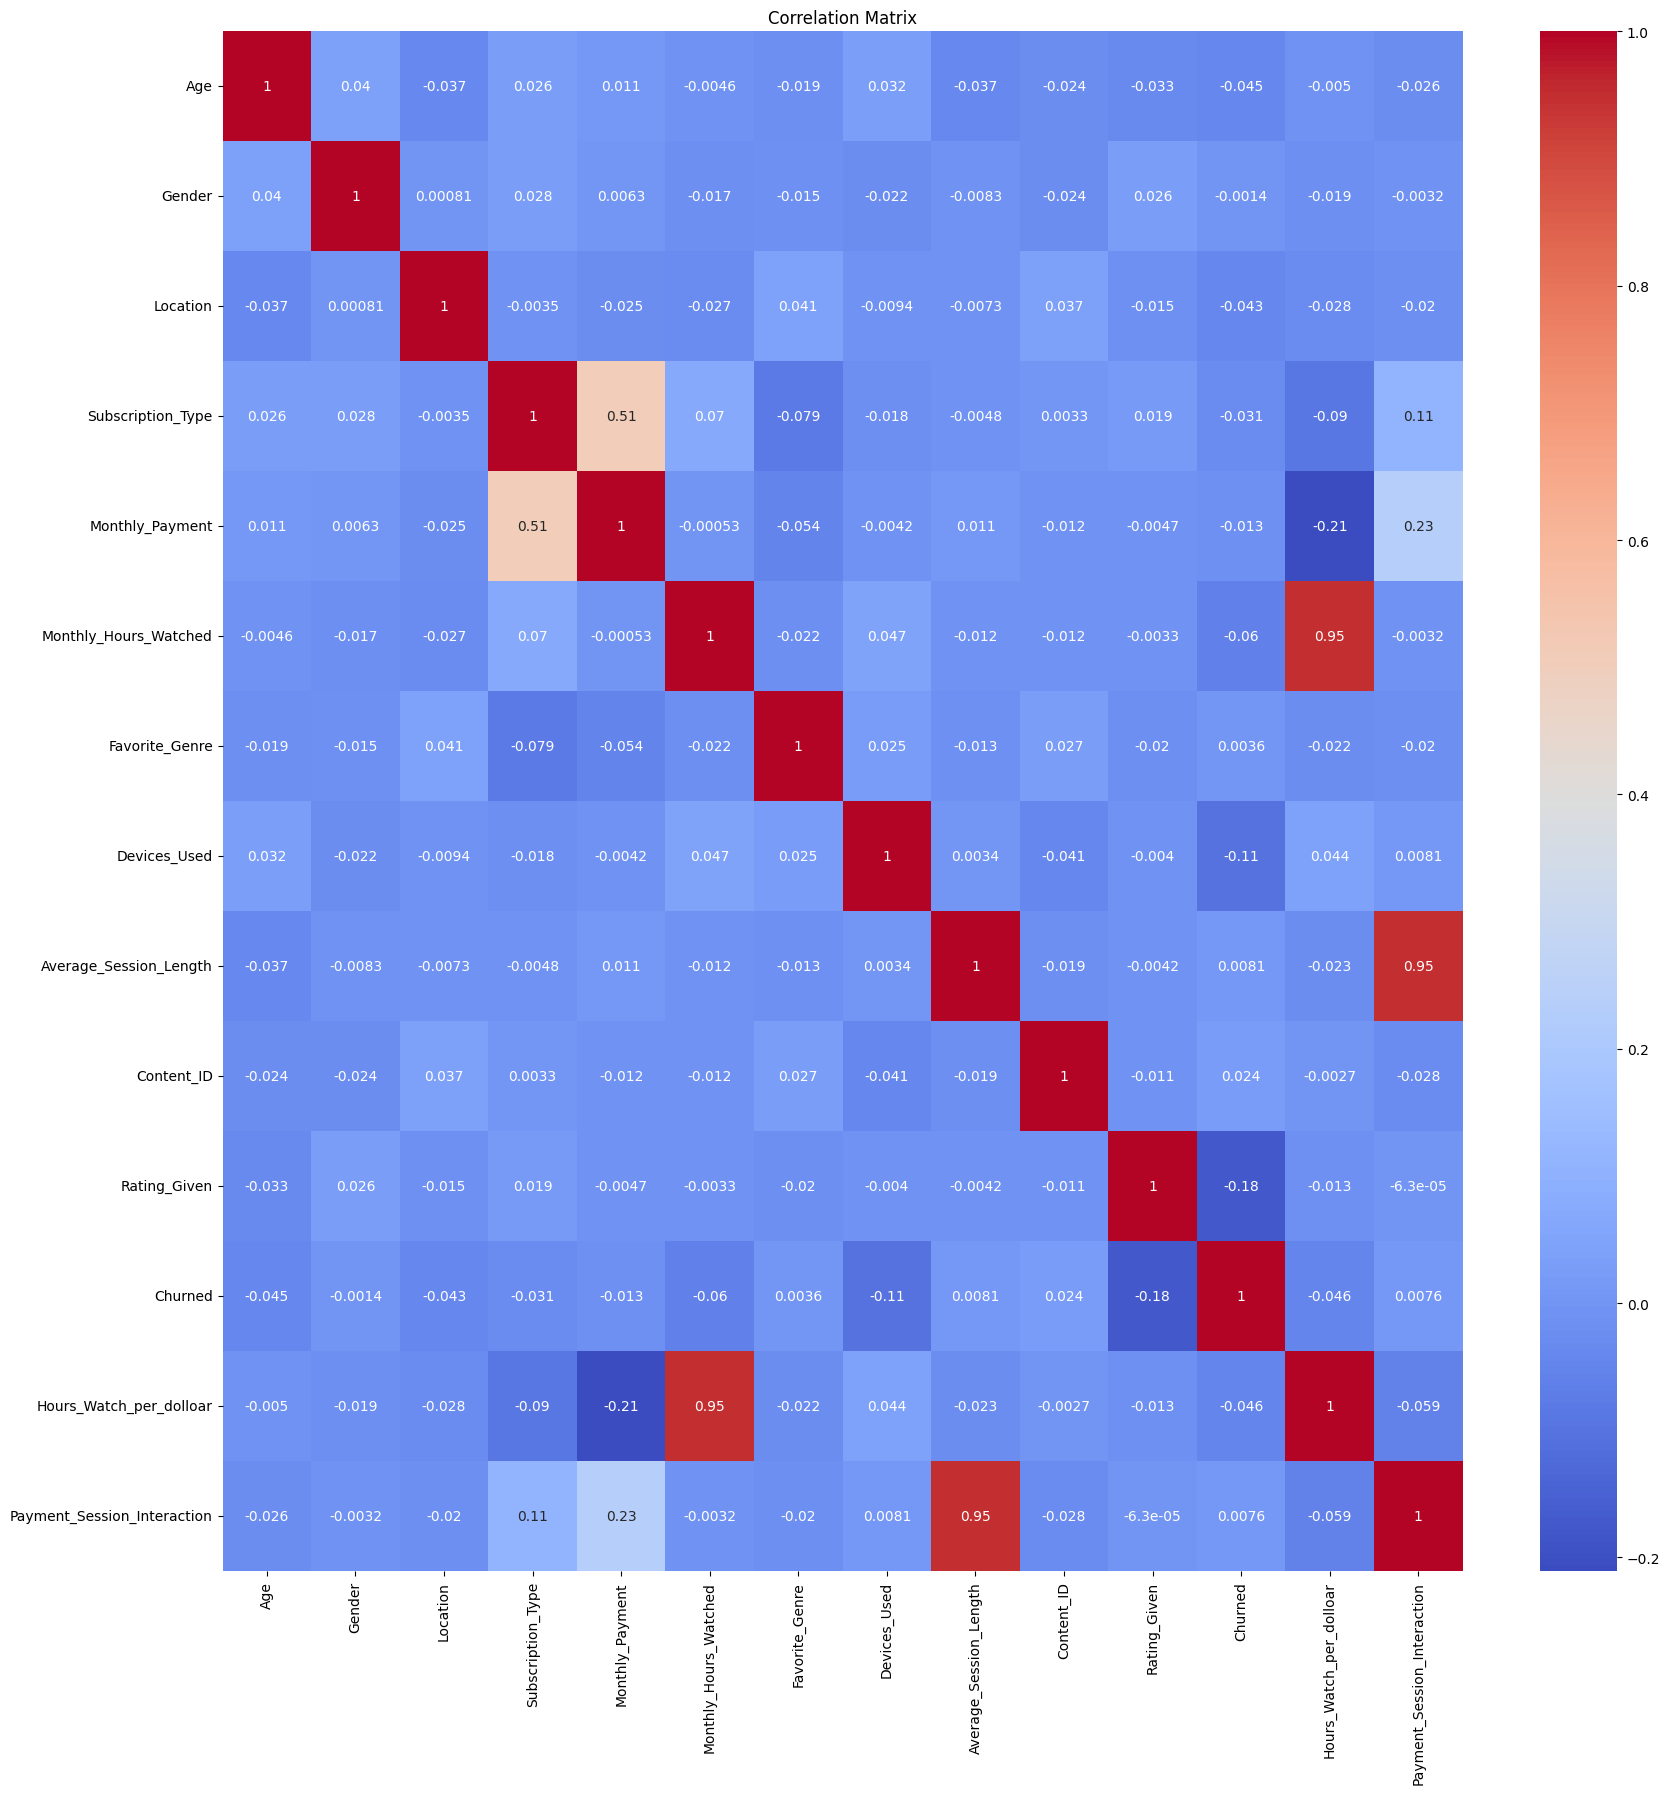

In [36]:
# Plot correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(df.drop(columns=['User_ID','Subscription_Start_Date', 'Payment_Method','Date_of_Churn','Reason_for_Churn','Subscription_Time_Length']).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [37]:
print(df[['Age','Gender','Location','Subscription_Type','Favorite_Genre','Devices_Used', 'Average_Session_Length','Rating_Given', 'Churned', 'Payment_Session_Interaction', 'Hours_Watch_per_dolloar']].corr())

                                  Age    Gender  Location  Subscription_Type  \
Age                          1.000000  0.039664 -0.036535           0.026027   
Gender                       0.039664  1.000000  0.000810           0.027716   
Location                    -0.036535  0.000810  1.000000          -0.003479   
Subscription_Type            0.026027  0.027716 -0.003479           1.000000   
Favorite_Genre              -0.018663 -0.014632  0.041069          -0.079339   
Devices_Used                 0.032138 -0.021925 -0.009392          -0.018148   
Average_Session_Length      -0.037128 -0.008297 -0.007347          -0.004779   
Rating_Given                -0.033234  0.025703 -0.014882           0.019099   
Churned                     -0.045139 -0.001354 -0.042543          -0.030966   
Payment_Session_Interaction -0.026036 -0.003153 -0.019765           0.106206   
Hours_Watch_per_dolloar     -0.005050 -0.018843 -0.027511          -0.089733   

                             Favorite_G

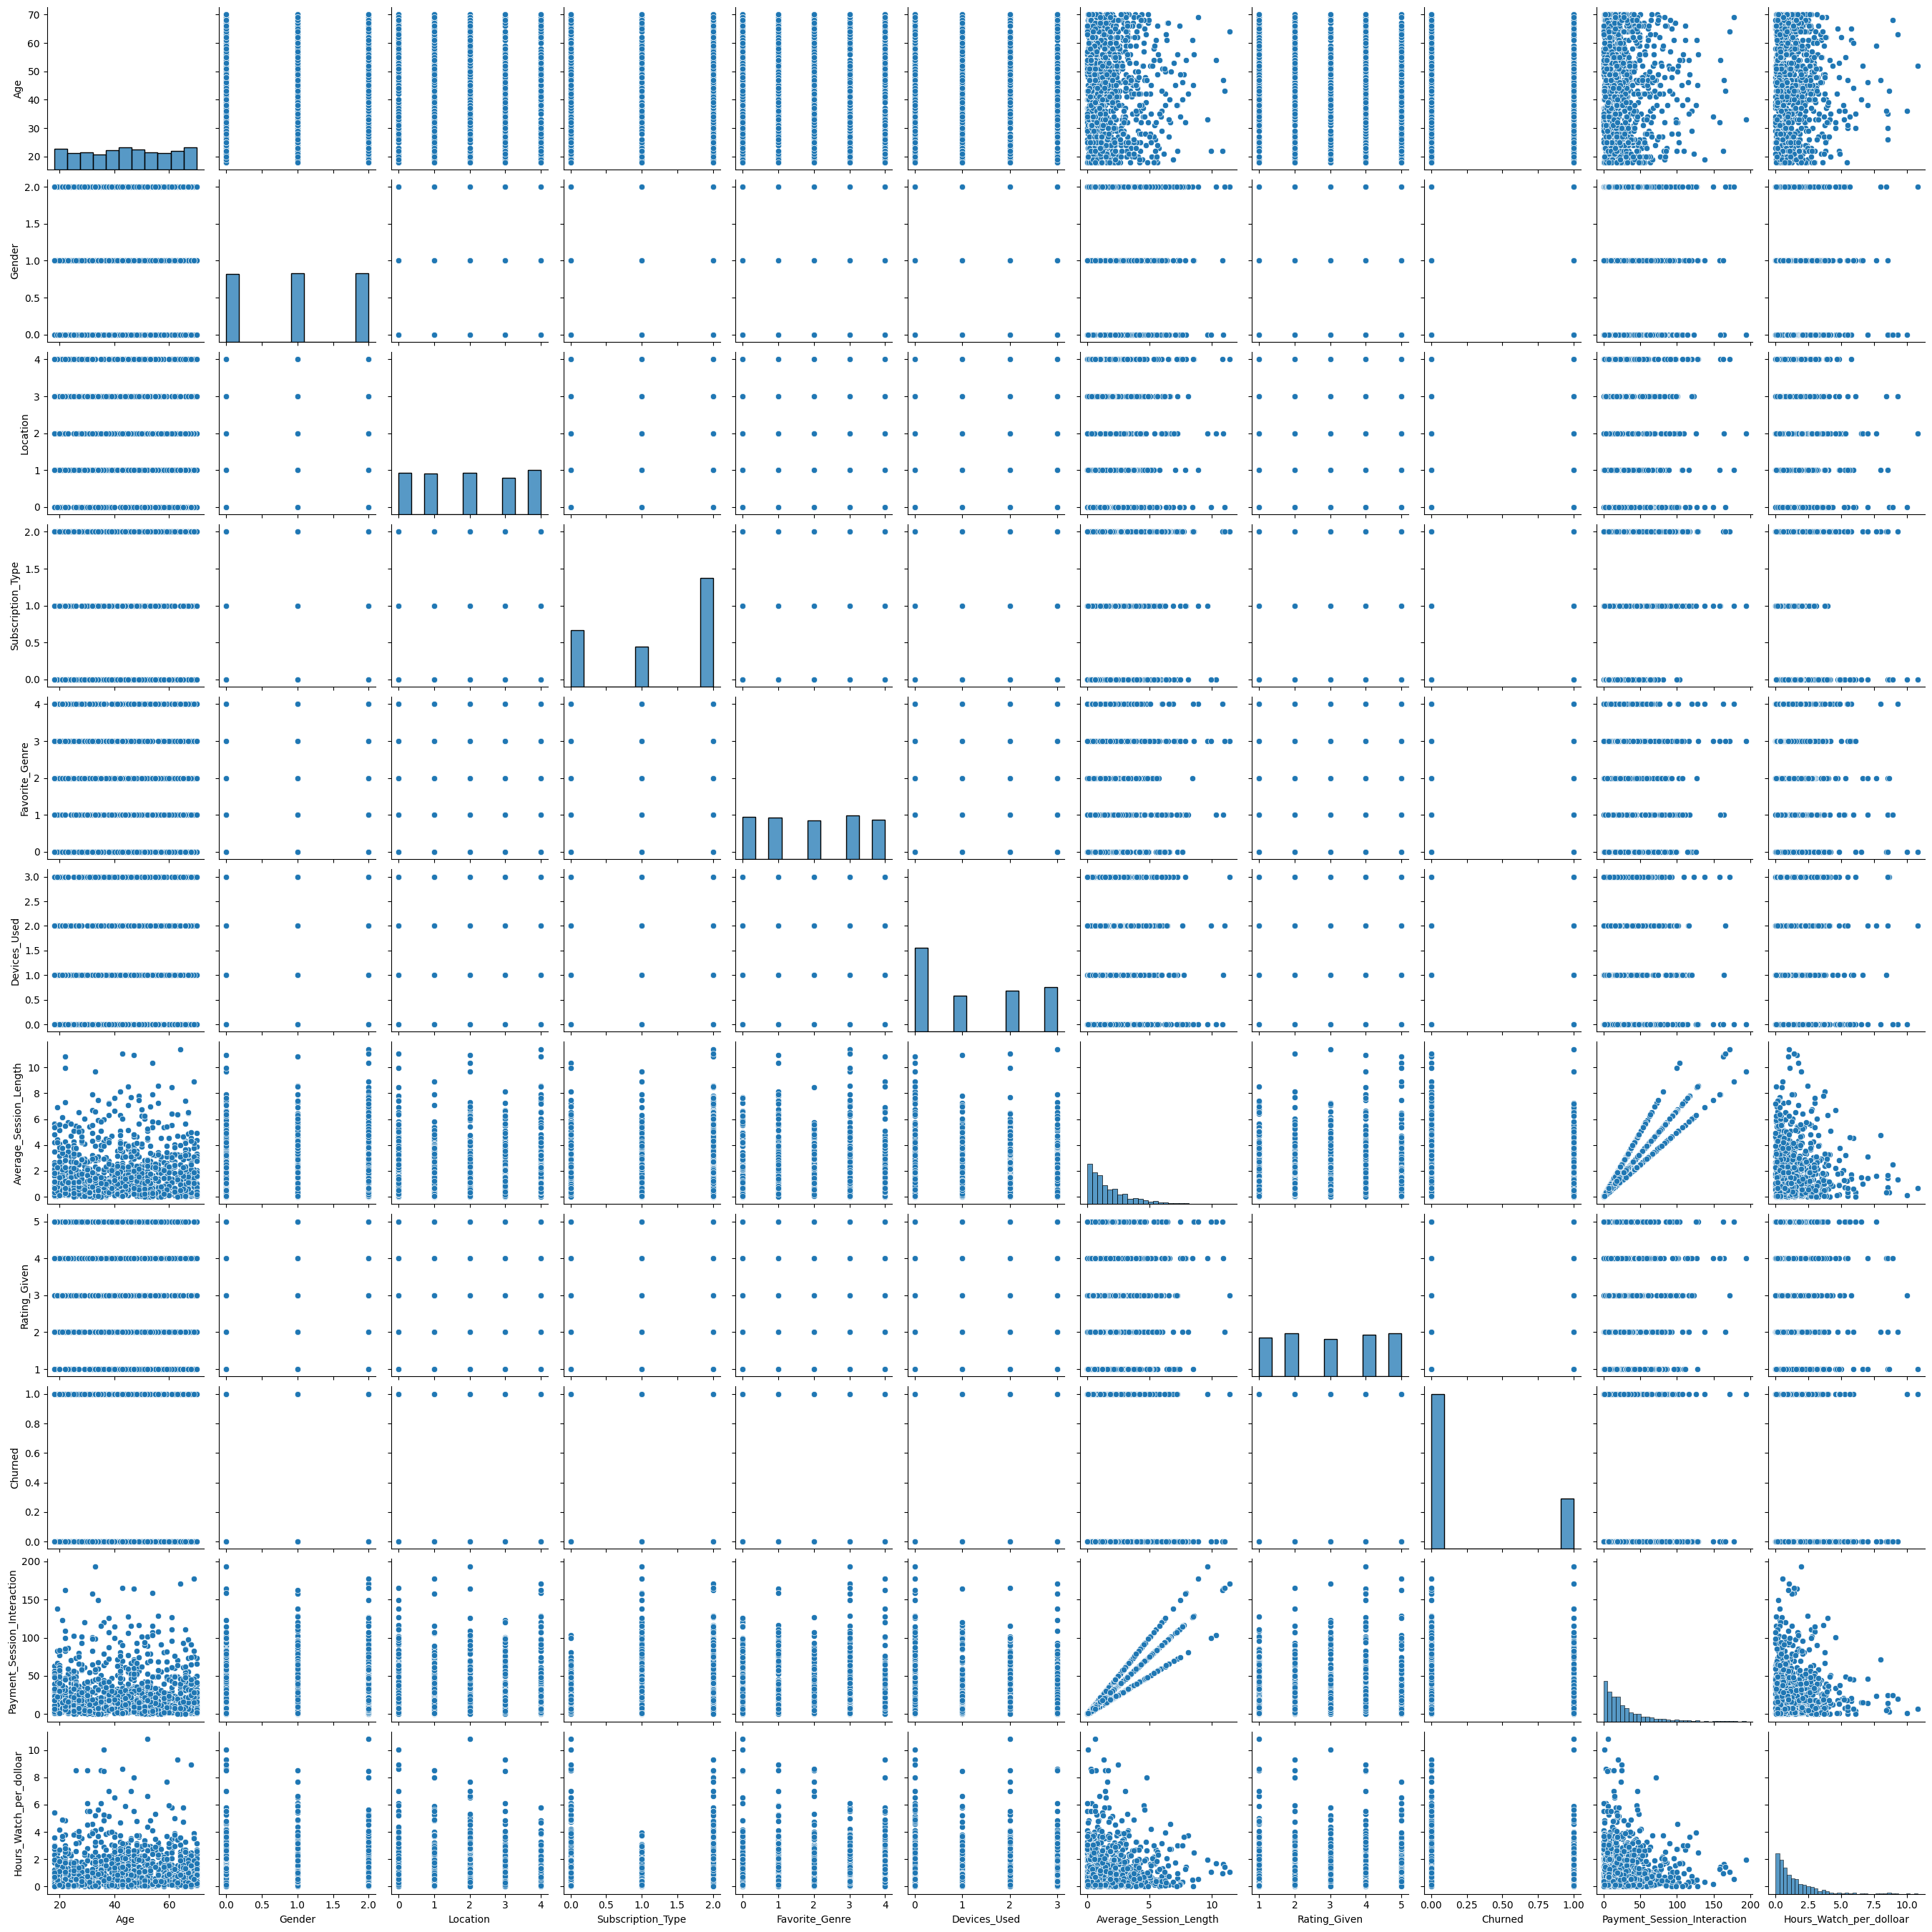

In [38]:
sns.pairplot(df[['Age','Gender','Location','Subscription_Type','Favorite_Genre','Devices_Used', 'Average_Session_Length','Rating_Given', 'Churned', 'Payment_Session_Interaction', 'Hours_Watch_per_dolloar']])

Hypothesis test on two populations: people who churned and people who not churned

In [39]:
#H0 = the location of client is impacting the churn rate
#HA = the location of client is not impacting the churn rate
alpha = 0.05
Location_0 = churned['Location']
Location_a = not_churned['Location']

from statsmodels.stats.weightstats import ztest as ztest

ztest(Location_0, Location_a, value=0) 
#p-value is greater than 0.05, fail to reject the H0

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#H0 = the Devices_Used of client is impacting the churn rate
#HA = the Devices_Used of client is not impacting the churn rate
Device_0 = churned['Devices_Used']
Device_a = not_churned['Devices_Used']

ztest(Device_0, Device_a, value=0) 
#p-value is less than 0.05, H0 should be rejected

(-3.3886787598548995, 0.0007023023487464082)

In [ ]:
#H0 = the Devices_Used for client is impacting the churn rate
#HA = the Devices_Used for client is not impacting the churn rate
price_sensitive_1 = churned['Monthly_Payment']
price_sensitive_2= not_churned['Monthly_Payment']

ztest(price_sensitive_1,price_sensitive_2,value=0)

(-0.4125732870202632, 0.6799192760841295)

In [ ]:
#H0 = the time spend is impacting the churn rate
#HA = the time spend is not impacting the churn rate
group1 = churned['Monthly_Hours_Watched']
group2= not_churned['Monthly_Hours_Watched']

ztest(group1,group2,value=0)

(-1.9062754969388838, 0.05661447158276054)

In [ ]:
#H0 = the gender of client is impacting the churn rate
#HA = the gender of client is not impacting the churn rate
gender_1 = churned['Gender'] 
gender_2 = not_churned['Gender']

ztest(gender_1,gender_2,value=0)

(-0.04278524454466832, 0.9658727263663729)

In [ ]:
#H0 = the content provided to client is impacting the churn rate
#HA = the content provided to client is not impacting the churn rate
content_1 = churned['Content_ID']
content_2 = not_churned['Content_ID']

ztest(content_1,content_2,value=0)

(0.7663922911511909, 0.4434429182996209)

Estimation on the impact

In [ ]:
annual_standard = 14.99*12*0.85
annual_standard 

152.898

In [40]:
#feedback vs. churned
df.groupby('Reason_for_Churn')['Churned'].value_counts()

Reason_for_Churn           Churned
Dissatisfied with content  1           52
Found better service       1           64
Not Churned                0          754
Personal reasons           1           62
Price increase             1           68
Name: Churned, dtype: int64

In [59]:
improved_churnrate_price= 1-(68*0.65+754)/1000

In [60]:
improved_churnrate_price

0.20179999999999998

In [61]:
improved_churnrate_service= 1-((68+64)*0.65+754)/1000

In [62]:
improved_churnrate_service

0.1602

In [63]:
improved_churnrate_content = 1-((68+64+52)*0.65+754)/1000

In [64]:
improved_churnrate_content

0.12639999999999996

In [79]:
average_revenue_per_customer = total_revenue/1000
average_revenue_per_customer

11.012459999999999

In [76]:
revenue_improved=average_revenue_per_customer*(1000-1000*improved_churnrate_content)
original_revenue=average_revenue_per_customer*(1000-1000*0.246)
percentage_improved=(revenue_improved-original_revenue)/original_revenue

In [77]:
percentage_improved

0.15862068965517248